In [88]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as spst
from numpy.linalg import inv
from numpy.linalg import eigvals
from numpy.linalg import eig
from itertools import product

In [31]:
"{0:b}".format(3)


'11'

In [32]:
#transform states as binary number.
state = '11000'
basis = int (state,2)  # base 2 pour binaire 
print("The binary number for the state",state ,"is" ,basis)

The binary number for the state 11000 is 24


In [33]:
# Count set
# bits in an integer 
 
# Function to get no of set bits in binary
def  countSetBits(n):
    count = 0
    while (n):
        count += n & 1
        n >>= 1
    return count

Generate the basis 

In [34]:
def makeSzBasis(L):
    basisSzList = [[] for i in range(-L,L+1,2)] #S_z can range from -L to L,
    
    for i in range(2**L): #2^L configurations
        Sz_i = countSetBits(i) 
        basisSzList[(Sz_i)].append(i) 
    return basisSzList 

number of spins = 2
basis size = 4


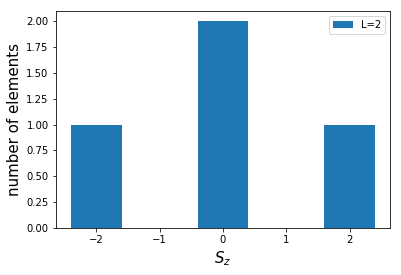

In [35]:
L = 2 #number of spin  
basisSzList = makeSzBasis(L)
Sz_data  = []
number_of_elements = []

print("number of spins =",L)
print("basis size =",2**L)

for i in range(len(basisSzList)):
    Sz_data.append(-L+2*i)
    number_of_elements.append(len(basisSzList[i]))
plt.bar(Sz_data,number_of_elements,label="L="+str(L))

plt.xlabel(r"$S_z$",fontsize=15)
plt.ylabel("number of elements",fontsize=15)
plt.legend()
plt.show()




In [36]:
range(len(basisSzList))

range(0, 3)

In [37]:
print (Sz_data)

[-2, 0, 2]


In [38]:
print (basisSzList)

[[0], [1, 2], [3]]


Generate the Hamiltonian 

In [39]:
#conditons aux limites periodiques cercle  ecrire H en fonction de sz s+ et s-
#regrouper les vecteur propre par sZ egaux (fait)
#que fait H sur tout les spins up ou tout les spin down 
#quelle serait les etat propre dans un secteur ou l'on a un seul spin 
#commutateur de sz avec H
# tracer aimentation moyenne

In [40]:
flat_1 = [x for l in basisSzList for x in l]
print (flat_1)
spin_string = []
for i in range(len(flat_1)):
    spin_string.append("{0:b}".format(flat_1[i]))
print (spin_string)
#convert all strings in list of integers 
for i in range(0, len(spin_string)): 
    spin_string[i] = int(spin_string[i]) 
print (spin_string)
spin = np.array(spin_string)
print (spin)

[0, 1, 2, 3]
['0', '1', '10', '11']
[0, 1, 10, 11]
[ 0  1 10 11]


In [41]:
for a in range (L):
    spin_i = [[] for x in range(L)]
for i in range (L):
    if i < 1 :
        spin_i[i].append(0)
    for j in range(len(spin)) :
        if 10**(i) <= spin[j] < 10** (i+1):
            spin_i[i].append(spin[j])
        
print (spin_i)



[[0, 1], [10, 11]]


In [42]:
def Matrix_S_z(L,basisSzList):
    #regroupement des liste des spins en une liste
    flat_1 = [x for l in basisSzList for x in l]
    #convertir liste en binaire
    spin_string = []
    for i in range(len(flat_1)):
        spin_string.append("{0:b}".format(flat_1[i]))
    #ajout de 0 au elements manquant 
    for k in range(len(spin_string)):
        while len(spin_string[k])< len(spin_string[-1]) :
            spin_string[k]='0'+spin_string[k]
    # convertir list of string en array
    spin_i=[]
    for k in range(L) :
        spink=np.array([])
        for h in range(len(spin_string)):
            spink=np.append(spink,int(spin_string[h][k]))
        spin_i.append(spink) 
    S_z=[]
    
    #creation de la matrice identité 
    for i in range(L):

        S_i = np.identity(2**L)
    #si spin = 0 S_i jj = -1/2 
    #si spin = 1 S_i jj = 1/2 
    
        for k in range(len(spin_i[i])):
            if spin_i[i][k] == 0.:
                S_i[k][k] = S_i[k][k] * (-1/2)
            else: 
                S_i[k][k] = S_i[k][k] * (1/2)
    

        S_z.append(S_i)
        
        #S_z = np.matrix(S_z)
    return S_z



In [77]:
L=3
Matrix_S_z(L,makeSzBasis(L))

[array([[-0.5,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
        [ 0. , -0.5,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
        [ 0. ,  0. , -0.5,  0. ,  0. ,  0. ,  0. ,  0. ],
        [ 0. ,  0. ,  0. ,  0.5,  0. ,  0. ,  0. ,  0. ],
        [ 0. ,  0. ,  0. ,  0. , -0.5,  0. ,  0. ,  0. ],
        [ 0. ,  0. ,  0. ,  0. ,  0. ,  0.5,  0. ,  0. ],
        [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0.5,  0. ],
        [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0.5]]),
 array([[-0.5,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
        [ 0. , -0.5,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
        [ 0. ,  0. ,  0.5,  0. ,  0. ,  0. ,  0. ,  0. ],
        [ 0. ,  0. ,  0. , -0.5,  0. ,  0. ,  0. ,  0. ],
        [ 0. ,  0. ,  0. ,  0. ,  0.5,  0. ,  0. ,  0. ],
        [ 0. ,  0. ,  0. ,  0. ,  0. , -0.5,  0. ,  0. ],
        [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0.5,  0. ],
        [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0.5]]),
 array([[-0.5,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
        [ 

In [44]:
#matrices S+_j*S-_j+1
    #creation annihilation
def Matrix_S_plus_moins(L,basisSzList):
    flat_1 = [x for l in basisSzList for x in l]
    
    spin_string = []
    for i in range(len(flat_1)):
        spin_string.append("{0:b}".format(flat_1[i]))
    for k in range(len(spin_string)):
        while len(spin_string[k])< len(spin_string[-1]) :
            spin_string[k]='0'+spin_string[k]
    spin_i=[]
    for k in range(L) :
        spink=np.array([])
        for h in range(len(spin_string)):
            spink=np.append(spink,int(spin_string[h][k]))
        spin_i.append(spink) 
    

    #S+_j*S-_j+1
    #creation annihilation
    S_c_a = []   
    
    S_i = np.zeros((2**L,2**L))
    

    for i in range (L-1):
        for j in range(len(spin_i[0])):
            if spin_i[i][j] == 0. and spin_i[i+1][j] == 1:
                    S_i[j+1][j] = S_i[j+1][j] + 1
    
    S_c_a.append(S_i)
    S_c_a = np.asarray(S_c_a)

    return S_c_a

In [45]:
L=2
Matrix_S_plus_moins(L,makeSzBasis(L))

array([[[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 0., 0.]]])

In [46]:
#matrices  S-_j*S+_j+1
    #annihilation creation
def Matrix_S_moins_plus(L,basisSzList):
    flat_1 = [x for l in basisSzList for x in l]
    
    spin_string = []
    for i in range(len(flat_1)):
        spin_string.append("{0:b}".format(flat_1[i]))
    for k in range(len(spin_string)):
        while len(spin_string[k])< len(spin_string[-1]) :
            spin_string[k]='0'+spin_string[k]
    spin_i=[]
    for k in range(L) :
        spink=np.array([])
        for h in range(len(spin_string)):
            spink=np.append(spink,int(spin_string[h][k]))
        spin_i.append(spink) 
    

     #S-_j*S+_j+1
    #annihilation creation
    S_a_c = []  

    
    S_i = np.zeros((2**L,2**L))


    
    for i in range (L-1):
        for j in range(len(spin_i[0])):
            if spin_i[i][j] == 1. and spin_i[i+1][j] == 0:
                S_i[j-1][j] = S_i[j-1][j] + 1

    S_a_c.append(S_i)
    S_a_c = np.asarray(S_a_c)

    return S_a_c 

In [47]:
L=2
Matrix_S_moins_plus(L,makeSzBasis(L))

array([[[0., 0., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]]])

In [112]:
def Hamiltonian(Jz,Jxy,h,L,basisSzList,S_z,S_c_a,S_a_c):
    A = []
    for i in range(L):
        a = (i+1) % L
        H = Jxy/4 * (S_c_a + S_a_c)  + Jz * (S_z[i] * S_z[a]) -h * sum(S_z,0)
        A.append(H)
    
    return  A



In [113]:
L = 3
Jz = 1
Jxy = 0
h = 0
S_z = Matrix_S_z(L,makeSzBasis(L))
S_c_a = Matrix_S_plus_moins(L,makeSzBasis(L))
S_a_c = Matrix_S_moins_plus(L,makeSzBasis(L))
H = Hamiltonian(Jz,Jxy,h,L,makeSzBasis(L),S_z,S_a_c,S_c_a)
print (H)

[array([[[ 0.25,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
        [ 0.  ,  0.25,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
        [ 0.  ,  0.  , -0.25,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
        [ 0.  ,  0.  ,  0.  , -0.25,  0.  ,  0.  ,  0.  ,  0.  ],
        [ 0.  ,  0.  ,  0.  ,  0.  , -0.25,  0.  ,  0.  ,  0.  ],
        [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  , -0.25,  0.  ,  0.  ],
        [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.25,  0.  ],
        [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.25]]]), array([[[ 0.25,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
        [ 0.  , -0.25,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
        [ 0.  ,  0.  , -0.25,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
        [ 0.  ,  0.  ,  0.  ,  0.25,  0.  ,  0.  ,  0.  ,  0.  ],
        [ 0.  ,  0.  ,  0.  ,  0.  ,  0.25,  0.  ,  0.  ,  0.  ],
        [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  , -0.25,  0.  ,  0.  ],
        [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  , -0.25,  0.  ],
      

In [50]:
H = np.matrix(H)

In [51]:
np.transpose(H)

matrix([[ 0.75,  0.  ,  0.  ,  0.  ],
        [ 0.  , -0.75,  0.25,  0.  ],
        [ 0.  ,  0.25,  0.25,  0.  ],
        [ 0.  ,  0.  ,  0.  , -0.25]])

In [52]:
eigvals(H)


array([ 0.30901699, -0.80901699,  0.75      , -0.25      ])

In [53]:
eigen = eig(H)
print (eigen)

(array([ 0.30901699, -0.80901699,  0.75      , -0.25      ]), matrix([[ 0.        ,  0.        ,  1.        ,  0.        ],
        [ 0.22975292,  0.97324899,  0.        ,  0.        ],
        [ 0.97324899, -0.22975292,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  1.        ]]))


In [54]:
P = eigen [1]
print (P)

[[ 0.          0.          1.          0.        ]
 [ 0.22975292  0.97324899  0.          0.        ]
 [ 0.97324899 -0.22975292  0.          0.        ]
 [ 0.          0.          0.          1.        ]]


In [55]:
D = eigen [0]
print (D)
D= np.diag (D)
print (D)

[ 0.30901699 -0.80901699  0.75       -0.25      ]
[[ 0.30901699  0.          0.          0.        ]
 [ 0.         -0.80901699  0.          0.        ]
 [ 0.          0.          0.75        0.        ]
 [ 0.          0.          0.         -0.25      ]]


In [56]:
inv(P)

matrix([[ 0.        ,  0.22975292,  0.97324899,  0.        ],
        [ 0.        ,  0.97324899, -0.22975292,  0.        ],
        [ 1.        ,  0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  1.        ]])

In [57]:
M = P*D*inv(P)
print (M)

[[ 0.75  0.    0.    0.  ]
 [ 0.   -0.75  0.25  0.  ]
 [ 0.    0.25  0.25  0.  ]
 [ 0.    0.    0.   -0.25]]


In [58]:
diff = H - M
print (diff)


[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  1.11022302e-16  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -5.55111512e-17  2.77555756e-17  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]]


In [59]:
x = np.array([0,1,0,0,0,0,0,0])
a = H.dot(x) 
print (a)

ValueError: shapes (4,4) and (8,) not aligned: 4 (dim 1) != 8 (dim 0)

In [72]:
L = 2 
for i in range (L-1):
    print (i)

0
